In [1]:
import numpy as np
import pandas as pd
from io import StringIO

## Simple Example

In [2]:
# Example data from the lesson
df = pd.read_csv(StringIO('''
yesterday,temp,today
no rain,80,rain
no rain,80,rain
no rain,80,no rain
rain,81,rain
rain,81,rain
rain,83,rain
rain,86,no rain
no rain,89,rain
rain,89,rain
no rain,89,no rain'''))

In [3]:
df

,yesterday,temp,today
0,no rain,80,rain
1,no rain,80,rain
2,no rain,80,no rain
3,rain,81,rain
4,rain,81,rain
5,rain,83,rain
6,rain,86,no rain
7,no rain,89,rain
8,rain,89,rain
9,no rain,89,no rain


In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

X, y = df[['temp']], df.today

tree = DecisionTreeClassifier()
tree.fit(X, y)

DecisionTreeClassifier()

In [5]:
tree.score(X,y)

0.8

In [7]:
export_text(tree)

'|--- feature_0 <= 84.50\n|   |--- feature_0 <= 80.50\n|   |   |--- class: rain\n|   |--- feature_0 >  80.50\n|   |   |--- class: rain\n|--- feature_0 >  84.50\n|   |--- feature_0 <= 87.50\n|   |   |--- class: no rain\n|   |--- feature_0 >  87.50\n|   |   |--- class: rain\n'

In [5]:
print(export_text(tree, feature_names=X.columns.tolist()))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- class: rain
|   |--- temp >  80.50
|   |   |--- class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- class: no rain
|   |--- temp >  87.50
|   |   |--- class: rain



In [8]:
print(export_text(tree, feature_names=X.columns.tolist(), show_weights = True))

|--- temp <= 84.50
|   |--- temp <= 80.50
|   |   |--- weights: [1.00, 2.00] class: rain
|   |--- temp >  80.50
|   |   |--- weights: [0.00, 3.00] class: rain
|--- temp >  84.50
|   |--- temp <= 87.50
|   |   |--- weights: [1.00, 0.00] class: no rain
|   |--- temp >  87.50
|   |   |--- weights: [1.00, 2.00] class: rain



[Text(167.4, 181.2, 'X[0] <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(83.7, 108.72, 'X[0] <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

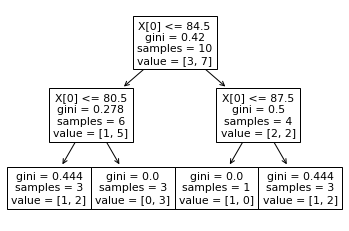

In [10]:
plot_tree(tree)

[Text(167.4, 181.2, 'temp <= 84.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]\nclass = rain'),
 Text(83.7, 108.72, 'temp <= 80.5\ngini = 0.278\nsamples = 6\nvalue = [1, 5]\nclass = rain'),
 Text(41.85, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = rain'),
 Text(251.10000000000002, 108.72, 'temp <= 87.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]\nclass = no rain'),
 Text(209.25, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no rain'),
 Text(292.95, 36.23999999999998, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = rain')]

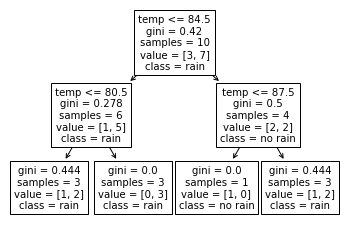

In [11]:
plot_tree(tree, feature_names= X.columns.tolist(), class_names=sorted(y.unique()))

## Titanic Example

In [12]:
import acquire
import prepare

train, validate, test = prepare.prep_titanic_data(acquire.get_titanic_data(), column = 'age', method = 'median', dummies = ['embarked', 'sex'])

train.head()

,passenger_id,survived,pclass,age,sibsp,parch,fare,class,alone,embarked_Q,embarked_S,sex_male
583,583,0,1,36.0,0,0,40.1250,First,1,0,0,1
165,165,1,3,9.0,0,2,20.5250,Third,0,0,1,1
50,50,0,3,7.0,4,1,39.6875,Third,0,0,1,1
259,259,1,2,50.0,0,1,26.0000,Second,0,0,1,0
306,306,1,1,28.0,0,0,110.8833,First,1,0,0,0


In [13]:
X_cols = ['pclass', 'alone', 'embarked_Q', 'embarked_S']
y_col = 'survived'

X_train, y_train = train[X_cols], train[y_col]
X_validate, y_validate = validate[X_cols], validate[y_col]
X_test, y_test = test[X_cols], test[y_col]

In [15]:
#with no max_dept
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 69.88%
validate score: 70.09%


[Text(759.7384615384616, 597.96, 'pclass <= 2.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(412.0615384615385, 489.24, 'alone <= 0.5\ngini = 0.494\nsamples = 229\nvalue = [102, 127]'),
 Text(257.53846153846155, 380.52000000000004, 'embarked_Q <= 0.5\ngini = 0.44\nsamples = 101\nvalue = [33, 68]'),
 Text(206.03076923076924, 271.8, 'embarked_S <= 0.5\ngini = 0.435\nsamples = 100\nvalue = [32, 68]'),
 Text(103.01538461538462, 163.07999999999998, 'pclass <= 1.5\ngini = 0.36\nsamples = 34\nvalue = [8, 26]'),
 Text(51.50769230769231, 54.360000000000014, 'gini = 0.337\nsamples = 28\nvalue = [6, 22]'),
 Text(154.52307692307693, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(309.04615384615386, 163.07999999999998, 'pclass <= 1.5\ngini = 0.463\nsamples = 66\nvalue = [24, 42]'),
 Text(257.53846153846155, 54.360000000000014, 'gini = 0.469\nsamples = 24\nvalue = [9, 15]'),
 Text(360.55384615384617, 54.360000000000014, 'gini = 0.459\nsamples = 42\nvalue = [15, 

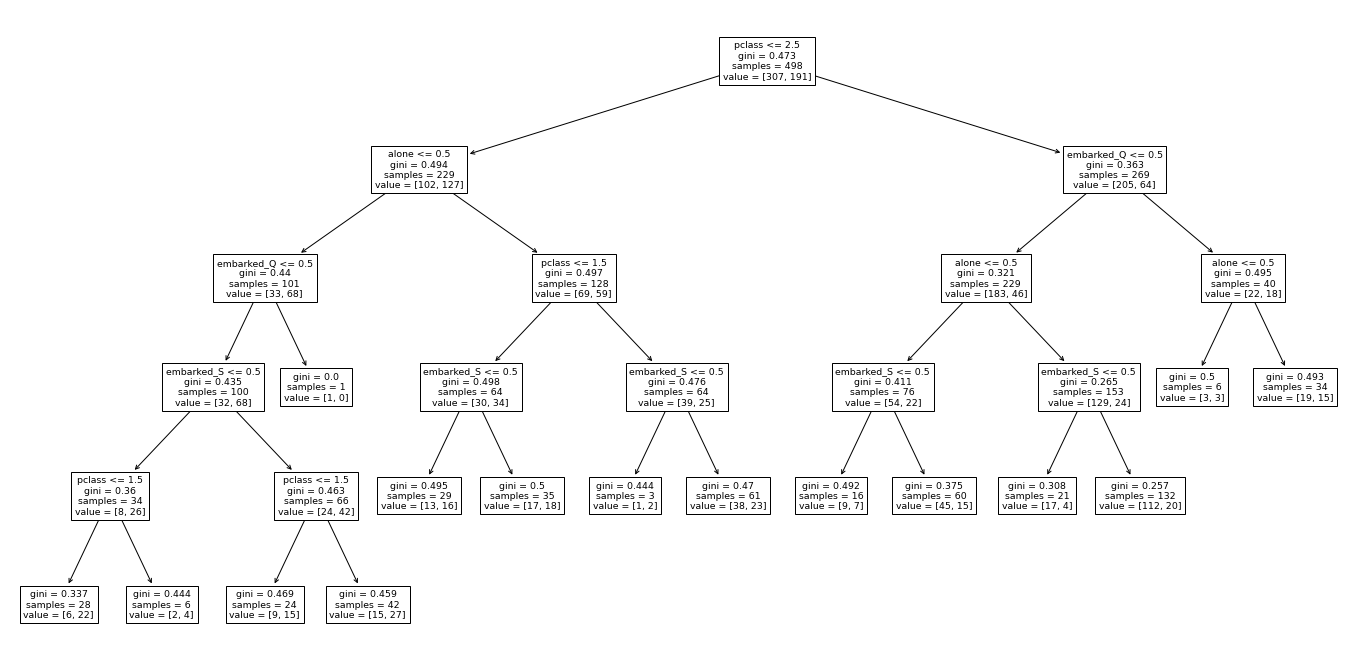

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize = (24,12))
plot_tree(
    model1,
    feature_names= X_train.columns.tolist(),
 
)

In [ ]:
#now with max_depths

In [14]:
model1 = DecisionTreeClassifier(max_depth=1)
model1.fit(X_train, y_train)

print(f'training score: {model1.score(X_train, y_train):.2%}')
print(f'validate score: {model1.score(X_validate, y_validate):.2%}')

training score: 66.67%
validate score: 65.89%


In [ ]:
# TODO: interpret + visualize model

In [ ]:
# TODO: create additional models

[Text(669.6, 570.7800000000001, 'pclass <= 2.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = dies'),
 Text(334.8, 407.70000000000005, 'alone <= 0.5\ngini = 0.494\nsamples = 229\nvalue = [102, 127]\nclass = survived'),
 Text(167.4, 244.62, 'embarked_Q <= 0.5\ngini = 0.44\nsamples = 101\nvalue = [33, 68]\nclass = survived'),
 Text(83.7, 81.53999999999996, 'gini = 0.435\nsamples = 100\nvalue = [32, 68]\nclass = survived'),
 Text(251.10000000000002, 81.53999999999996, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = dies'),
 Text(502.20000000000005, 244.62, 'pclass <= 1.5\ngini = 0.497\nsamples = 128\nvalue = [69, 59]\nclass = dies'),
 Text(418.5, 81.53999999999996, 'gini = 0.498\nsamples = 64\nvalue = [30, 34]\nclass = survived'),
 Text(585.9, 81.53999999999996, 'gini = 0.476\nsamples = 64\nvalue = [39, 25]\nclass = dies'),
 Text(1004.4000000000001, 407.70000000000005, 'embarked_Q <= 0.5\ngini = 0.363\nsamples = 269\nvalue = [205, 64]\nclass = dies'),
 Text(837.0, 244.62, 'al

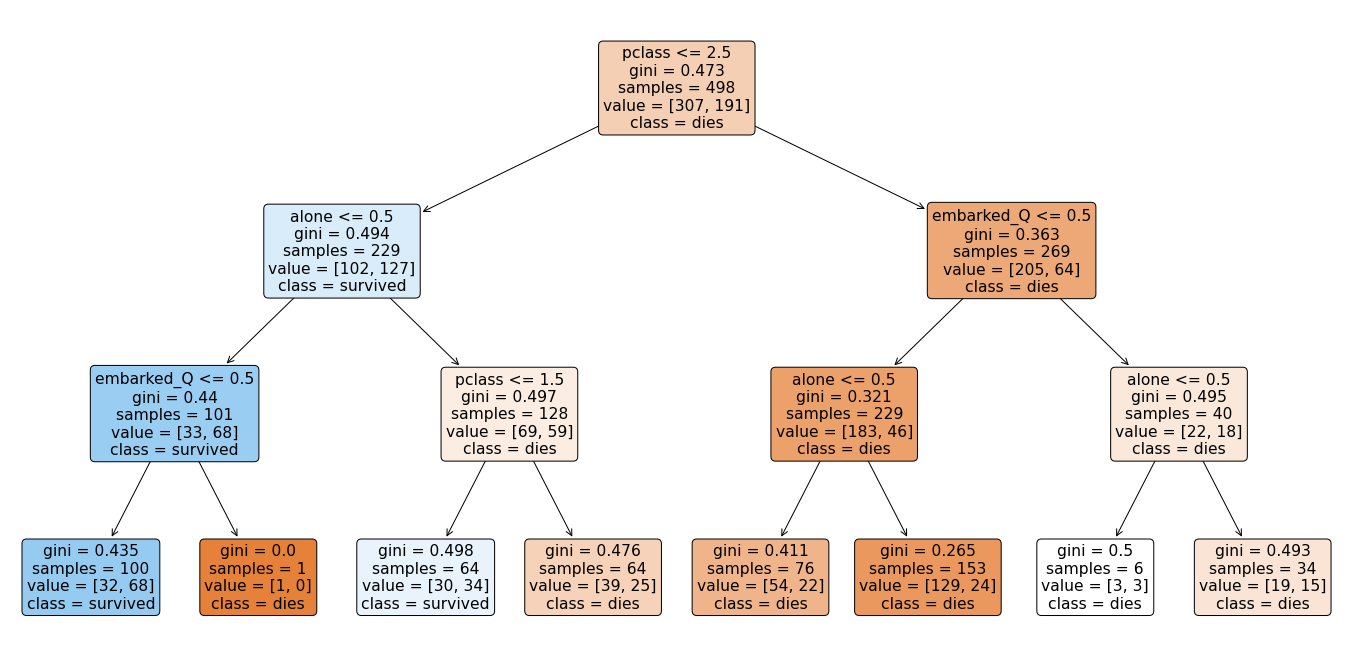

In [28]:
#now with max_depths to avoid overfitting

model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)
plt.figure(figsize = (24,12))
plot_tree(
    model1,
    feature_names= X_train.columns.tolist(),
    class_names= ['dies', 'survived'],
    filled=True,
    rounded=True
)

In [22]:
model2.feature_importances_

array([0.68385205, 0.18127348, 0.13487447, 0.        ])

In [24]:
dict(zip(X_train.columns, model2.feature_importances_))

{'pclass': 0.6838520475595664,
 'alone': 0.18127347767696972,
 'embarked_Q': 0.134874474763464,
 'embarked_S': 0.0}

In [25]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_)))

pclass        0.683852
alone         0.181273
embarked_Q    0.134874
embarked_S    0.000000
dtype: float64

With the output from the cell above, the index is the feature name, and the values are the importances of each feature, according to our decision tree model

<AxesSubplot:xlabel='Feature Importance'>

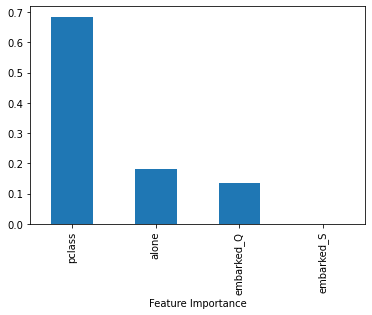

In [27]:
pd.Series(dict(zip(X_train.columns, model2.feature_importances_))).plot.bar(xlabel='Feature Importance')

## Recap

Decision Trees in the modeling loop

1. Create the model(setting hyperparamas)
2. Fit the object on traininf data (sklearn does math)
3. Interpret / use the model (evaluate its performance and see how it works)


In [ ]:
#to use export_graphviz
from sklearn.tree import export_graphviz